In [196]:
import pickle as pk
import pandas as pd
import datetime
import numpy as np
from tqdm import tqdm
import time
import math
import os
import gc
import argparse
import logging
import matplotlib.pyplot as plt
from numpy.linalg import inv, pinv
from sklearn import preprocessing

In [197]:
def plot_scatter(df, save_file, recipe_type):
    
    plt.figure(figsize=(50, 25))#建立圖表1
    plt.suptitle('{} Failure day {}'.format(file_name.split('.')[0],failure_date.date()), fontsize=30)
    
    min_speed = df.speed.min()#-0.02*df.speed.mean()
    max_speed = df.speed.max()#+0.02*df.speed.mean()
    min_torque = df.torque.min()#-0.02*df.torque.mean()
    max_torque = df.torque.max()#+0.02*df.torque.mean()
    
    print(min_speed)
    print(max_speed)
    print(min_torque)
    print(max_torque)
    
    ax1=plt.subplot(3,4,1)#在圖表2中建立子圖1
    ax2=plt.subplot(3,4,2)
    ax3=plt.subplot(3,4,3)
    ax4=plt.subplot(3,4,4)
    ax5=plt.subplot(3,4,5)
    ax6=plt.subplot(3,4,6)
    ax7=plt.subplot(3,4,7)
    ax8=plt.subplot(3,4,8)
    ax9=plt.subplot(3,4,9)
    ax10=plt.subplot(3,4,10)
    ax11=plt.subplot(3,4,11)
    ax12=plt.subplot(3,4,12)

    normal_day = df.starttime.min().date()
    plt.sca(ax1)
    plt.scatter(df[df['date']==normal_day].speed,df[df['date']==normal_day].torque,marker='.')
    plt.title('starttime_{}'.format(normal_day.strftime('%Y-%m-%d')), fontsize=30)
    plt.xlabel('speed')
    plt.ylabel('torque')
    plt.xlim(min_speed,max_speed)
    plt.ylim(min_torque,max_torque)

    normal_day_after_3_day = df.starttime.min().date()+datetime.timedelta(days=3)
    plt.sca(ax2)
    plt.scatter(df[df['date']==normal_day_after_3_day].speed,df[df['date']==normal_day_after_3_day].torque,marker='.')
    plt.title('{}'.format(normal_day_after_3_day.strftime('%Y-%m-%d')), fontsize=30)
    plt.xlabel('speed')
    plt.ylabel('torque')
    plt.xlim(min_speed,max_speed)
    plt.ylim(min_torque,max_torque)    

    normal_day_after_5_day = df.starttime.min().date()+datetime.timedelta(days=5)
    plt.sca(ax3)
    plt.scatter(df[df['date']==normal_day_after_5_day].speed,df[df['date']==normal_day_after_5_day].torque,marker='.')
    plt.title('{}'.format(normal_day_after_5_day.strftime('%Y-%m-%d')), fontsize=30)
    plt.xlabel('speed')
    plt.ylabel('torque')
    plt.xlim(min_speed,max_speed)
    plt.ylim(min_torque,max_torque)
    
    normal_day_after_7_day = df.starttime.min().date()+datetime.timedelta(days=7)
    plt.sca(ax4)
    plt.scatter(df[df['date']==normal_day_after_7_day].speed,df[df['date']==normal_day_after_7_day].torque,marker='.')
    plt.title('{}'.format(normal_day_after_7_day.strftime('%Y-%m-%d')), fontsize=30)
    plt.xlabel('speed')
    plt.ylabel('torque')
    plt.xlim(min_speed,max_speed)
    plt.ylim(min_torque,max_torque)
    
    fail_date_before_5_day = failure_date.date()-datetime.timedelta(days=5)
    plt.sca(ax5)
    plt.scatter(df[df['date']==fail_date_before_5_day].speed,df[df['date']==fail_date_before_5_day].torque,marker='.')
    plt.title('{}'.format(fail_date_before_5_day.strftime('%Y-%m-%d')), fontsize=30)
    plt.xlabel('speed')
    plt.ylabel('torque')
    plt.xlim(min_speed,max_speed)
    plt.ylim(min_torque,max_torque)
    
    fail_date_before_3_day = failure_date.date()-datetime.timedelta(days=3)
    plt.sca(ax6)
    plt.scatter(df[df['date']==fail_date_before_3_day].speed,df[df['date']==fail_date_before_3_day].torque,marker='.')
    plt.title('{}'.format(fail_date_before_3_day.strftime('%Y-%m-%d')), fontsize=30)
    plt.xlabel('speed')
    plt.ylabel('torque')
    plt.xlim(min_speed,max_speed)
    plt.ylim(min_torque,max_torque)
    
    fail_date_before_1_day = failure_date.date()-datetime.timedelta(days=1)
    plt.sca(ax7)
    plt.scatter(df[df['date']==fail_date_before_1_day].speed,df[df['date']==fail_date_before_1_day].torque,marker='.')
    plt.title('{}'.format(fail_date_before_1_day.strftime('%Y-%m-%d')), fontsize=30)
    plt.xlabel('speed')
    plt.ylabel('torque')
    plt.xlim(min_speed,max_speed)
    plt.ylim(min_torque,max_torque)
    
    fail_date = failure_date.date()
    plt.sca(ax8)
    plt.scatter(df[df['date']==fail_date].speed,df[df['date']==fail_date].torque,marker='.')
    plt.title('failure_date_{}'.format(fail_date.strftime('%Y-%m-%d')), fontsize=30)
    plt.xlabel('speed')
    plt.ylabel('torque')
    plt.xlim(min_speed,max_speed)
    plt.ylim(min_torque,max_torque)
    
    fail_date_after_1_day = failure_date.date()+datetime.timedelta(days=1)
    plt.sca(ax9)
    plt.scatter(df[df['date']==fail_date_after_1_day].speed,df[df['date']==fail_date_after_1_day].torque,marker='.')
    plt.title('{}'.format(fail_date_after_1_day.strftime('%Y-%m-%d')), fontsize=30)
    plt.xlabel('speed')
    plt.ylabel('torque')
    plt.xlim(min_speed,max_speed)
    plt.ylim(min_torque,max_torque)
    
    fail_date_after_3_day = failure_date.date()+datetime.timedelta(days=3)
    plt.sca(ax10)
    plt.scatter(df[df['date']==fail_date_after_3_day].speed,df[df['date']==fail_date_after_3_day].torque,marker='.')
    plt.title('{}'.format(fail_date_after_3_day.strftime('%Y-%m-%d')), fontsize=30)
    plt.xlabel('speed')
    plt.ylabel('torque')
    plt.xlim(min_speed,max_speed)
    plt.ylim(min_torque,max_torque)
    
    fail_date_after_5_day = failure_date.date()+datetime.timedelta(days=5)
    plt.sca(ax11)
    plt.scatter(df[df['date']==fail_date_after_5_day].speed,df[df['date']==fail_date_after_5_day].torque,marker='.')
    plt.title('{}'.format(fail_date_after_5_day.strftime('%Y-%m-%d')), fontsize=30)
    plt.xlabel('speed')
    plt.ylabel('torque')
    plt.xlim(min_speed,max_speed)
    plt.ylim(min_torque,max_torque)
    
    fail_date_after_7_day = failure_date.date()+datetime.timedelta(days=7)
    plt.sca(ax12)
    plt.scatter(df[df['date']==fail_date_after_7_day].speed,df[df['date']==fail_date_after_7_day].torque,marker='.')
    plt.title('{}'.format(fail_date_after_7_day.strftime('%Y-%m-%d')), fontsize=30)
    plt.xlabel('speed')
    plt.ylabel('torque')
    plt.xlim(min_speed,max_speed)
    plt.ylim(min_torque,max_torque)
    
    plt.savefig('{}{}_{}.jpg'.format(save_file, file_name.split('.')[0], recipe_type))
    plt.show()

In [198]:
pkl = 'CAODF114R_RR_20200224_20200514.pkl'
recipe_type = 'multiple_recipe'

In [199]:
path = '/home/jackyyen/NEW_robot_data/'
failure_data = pd.read_csv('/home/jackyyen/record_final_v4.csv', encoding= 'unicode_escape')
save_file = './test/'

fr = open(os.path.join(path, pkl), 'rb')
df = pk.load(fr)
fr.close()

file_name = pkl

machine_tool = file_name.split('_')[0]
machine_tool_axis = file_name.split('_')[1]
machine_tool_strattime = file_name.split('_')[2]
machine_tool_endtime = file_name.split('.')[0].split('_')[3]

print('Failure date:'+str(failure_data[(failure_data['Tool ID']==machine_tool) & (failure_data['Axis']==machine_tool_axis)].iloc[0]['From Time']))
failure_date = failure_data[(failure_data['Tool ID']==machine_tool) & (failure_data['Axis']==machine_tool_axis)].iloc[0]['From Time']
failure_date = datetime.datetime.strptime(failure_date, '%Y/%m/%d %H:%M')

numerical_feature = ['speed','torque']
category_feature = ['starttime', 'point', 'step_name', 'date','recipe']

df = df.rename(columns={'STARTTIME':'starttime','RECIPE':'recipe','POINT':'point','SPEED':'speed','TORQUE':'torque','STEP_NAME':'step_name'})#'
df = df.sort_values(by=['starttime','point']).reset_index(drop=True) #??
df['starttime'] = df['starttime'].apply(lambda x: pd.Timestamp(x))  #
df['date'] = df['starttime'].apply(lambda x: x.date())
df['hour'] = df['starttime'].apply(lambda x: x.hour)

file_min_date = datetime.datetime.strptime(str(min(df['date'])), '%Y-%m-%d')
file_max_date = datetime.datetime.strptime(str(max(df['date'])),'%Y-%m-%d')
file_date_len = file_max_date - file_min_date

recipe_data = df['recipe'].value_counts()#.reset_index()

mask = np.nonzero(df.point.diff()<0)[0]
mask = np.concatenate([[0], mask])

seq_list = []
a = 0

for idx in tqdm(range(len(mask)-1)):
    seq = df.iloc[mask[idx]:mask[idx+1], :]
    if seq['step_name'].iloc[0]==0: #
        #seq.loc[:,numerical_feature] = prepare_data(seq.loc[:,numerical_feature])
        seq_list.append(seq)   #.values
    else:
        a+=1
        print(a)
        
print("Length range of the sequence: {} ~ {}".format(np.min(np.diff(mask)), np.max(np.diff(mask))))
#     print("Mean length of the sequence", np.mean(np.diff(mask)))

max_sequence = np.max(np.diff(mask))

df = df.reset_index(drop=True)
keep_cols = []
mask_idx = np.array(df.point.diff() < 0).nonzero()[0]
mask_idx = np.concatenate([[0], mask_idx])

for idx in tqdm(range(len(mask_idx)-1)):
    keep_cols.append(df.loc[mask_idx[idx]:mask_idx[idx + 1], 'speed'])
print(np.concatenate(keep_cols).shape)

/home/jackyyen/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Failure date:2020/4/24 21:00



 55%|█████▍    | 24519/44607 [00:13<00:11, 1772.82it/s]


100%|██████████| 44607/44607 [00:25<00:00, 1761.41it/s]


Length range of the sequence: 48 ~ 483



100%|██████████| 44607/44607 [00:08<00:00, 5559.20it/s]


(4437240,)


In [212]:
def prepare_AE_sequence(df, cols_to_drop):
    df = df.reset_index(drop=True)
    keep_cols = []
    mask_idx = np.array(df.point.diff() < 0).nonzero()[0]
    mask_idx = np.concatenate([[0], mask_idx])  # Remember to add the first index
    if (df.columns == 'CHAMBER').any():
        df = df.drop('CHAMBER', axis=1)

    tmp_df = df.drop(cols_to_drop, axis=1)

    scale_seq_list = []
    date_list = []
    raw_list = []
    cor_list = []
    time_list = []
    
    for idx in tqdm(range(len(mask_idx) - 1)):
        
        x1 = df.loc[mask_idx[idx]:mask_idx[idx + 1], 'speed']
        x2 = df.loc[mask_idx[idx]:mask_idx[idx + 1], 'torque']
        X = np.stack((x1, x2), axis=0)
        X_transformed = np.transpose(np.matmul(pinv(np.cov(X[:, :])), X - np.mean(X, axis=1).reshape(-1, 1)))
        cor_list.append(X_transformed)
        
        scale_seq = preprocessing.scale(df.loc[mask_idx[idx]:mask_idx[idx + 1], ['speed','torque']])
        scale_seq_list.append(scale_seq)
        
        raw_df = df.loc[mask_idx[idx]:mask_idx[idx + 1],:]
        raw_list.append(raw_df)

        date = df.loc[mask_idx[idx]:mask_idx[idx + 1], ['date']]
        date_list.append(date)
        
        time = df.loc[mask_idx[idx]:mask_idx[idx + 1], ['starttime']]
        time_list.append(time)

    return np.concatenate(date_list), np.concatenate(time_list),  np.concatenate(raw_list) ,np.concatenate(scale_seq_list), np.concatenate(cor_list)

# train generator figure

In [257]:
from random import sample
#df = df.reset_index(drop=True)

train_nor_st_date = df.starttime.min().date()
train_nor_ed_date = df.starttime.min().date() + datetime.timedelta(days=2)

trn_mask = (df['date'] >= train_nor_st_date) & (df['date'] <= train_nor_ed_date)
trn_nor_df = df.loc[trn_mask].reset_index(drop=True)

keep_cols = []
mask_idx = np.array(trn_nor_df.point.diff() < 0).nonzero()[0]
mask_idx = np.concatenate([[0], mask_idx])  # Remember to add the first index
if (trn_nor_df.columns == 'CHAMBER').any():
    trn_nor_df = trn_nor_df.drop('CHAMBER', axis=1)

tmp_df = trn_nor_df.drop(category_feature, axis=1)

scale_seq_list = []
date_list = []
raw_list = []
cor_list = []
time_list = []

for idx in tqdm(range(len(mask_idx) - 1)):

    x1 = trn_nor_df.loc[mask_idx[idx]:mask_idx[idx + 1], 'speed']
    x2 = trn_nor_df.loc[mask_idx[idx]:mask_idx[idx + 1], 'torque']
    X = np.stack((x1, x2), axis=0)
    X_transformed = np.transpose(np.matmul(pinv(np.cov(X[:, :])), X - np.mean(X, axis=1).reshape(-1, 1)))
    cor_list.append(X_transformed)
#     scale_seq = preprocessing.scale(df.loc[mask_idx[idx]:mask_idx[idx + 1], ['speed','torque']])
#     scale_seq_list.append(scale_seq)

#     raw_df = df.loc[mask_idx[idx]:mask_idx[idx + 1],:]
#     raw_list.append(raw_df)

#     date = df.loc[mask_idx[idx]:mask_idx[idx + 1], ['date']]
#     date_list.append(date)

#     time = df.loc[mask_idx[idx]:mask_idx[idx + 1], ['starttime']]
#     time_list.append(time)

for i in range(10):
    
    figure = sample(cor_list[:], 10)
    figure = np.concatenate(figure)
    plt.scatter(figure[:,0],figure[:,1])
    plt.show()


100%|██████████| 1707/1707 [00:01<00:00, 1552.33it/s]


In [245]:
figure[:,0].shape

(794574,)

In [241]:
len(cor_list)

44607

In [213]:
date, starttime, raw, zscore, cor = prepare_AE_sequence(df, cols_to_drop=category_feature)


  7%|▋         | 2949/44607 [00:14<03:25, 202.98it/s]


 13%|█▎        | 5947/44607 [00:30<03:06, 206.79it/s]


 20%|██        | 8950/44607 [00:45<02:54, 204.76it/s]


 27%|██▋       | 11932/44607 [00:59<02:40, 204.12it/s]


 33%|███▎      | 14893/44607 [01:14<02:25, 204.49it/s]


 40%|████      | 17853/44607 [01:28<02:09, 206.24it/s]


 47%|████▋     | 20785/44607 [01:44<01:55, 206.17it/s]


 53%|█████▎    | 23746/44607 [01:58<01:41, 205.27it/s]


 60%|█████▉    | 26707/44607 [02:12<01:26, 206.70it/s]


 67%|██████▋   | 29668/44607 [02:27<01:11, 208.44it/s]


 73%|███████▎  | 32620/44607 [02:41<00:57, 208.13it/s]


 80%|███████▉  | 35581/44607 [02:55<00:43, 208.26it/s]


 86%|████████▋ | 38542/44607 [03:11<00:29, 206.74it/s]


 93%|█████████▎| 41503/44607 [03:25<00:15, 206.62it/s]


100%|█████████▉| 44464/44607 [03:40<00:00, 205.49it/s]


100%|██████████| 44607/44607 [03:40<00:00, 202.11it/s]


In [222]:
date = pd.DataFrame(date, columns=['date'])
date = date.reset_index(drop=True)
starttime = pd.DataFrame(starttime, columns=['starttime'])
starttime = starttime.reset_index(drop=True)
raw = pd.DataFrame(raw, columns=df.columns)
raw = raw.reset_index(drop=True)
zscore = pd.DataFrame(zscore[:,:2], columns=['speed','torque'])
zscore = zscore.reset_index(drop=True)
cor = pd.DataFrame(cor, columns=['speed','torque'])
cor = cor.reset_index(drop=True)

TypeError: unhashable type: 'slice'

In [225]:
test = pd.concat([zscore,date,starttime,raw.point],axis=1)

In [ ]:
from random import sample

In [228]:
test

,speed,torque,date,starttime,point
0,-1.537964,-0.577331,2020-02-24,2020-02-24 00:00:50,1
1,-1.500378,-0.545213,2020-02-24,2020-02-24 00:00:50,2
2,-1.462791,-0.464918,2020-02-24,2020-02-24 00:00:50,3
3,-1.425204,-0.414064,2020-02-24,2020-02-24 00:00:50,4
4,-1.378220,-0.317709,2020-02-24,2020-02-24 00:00:50,5
5,-1.321840,-0.210648,2020-02-24,2020-02-24 00:00:50,6
6,-1.256063,-0.047380,2020-02-24,2020-02-24 00:00:50,7
7,-1.190286,-0.178530,2020-02-24,2020-02-24 00:00:50,8
8,-1.124508,0.083769,2020-02-24,2020-02-24 00:00:50,9
9,-1.039938,-0.007232,2020-02-24,2020-02-24 00:00:50,10


-2.9806945949199353
3.3823203797096
-10.862780491200215
4.088473090565468


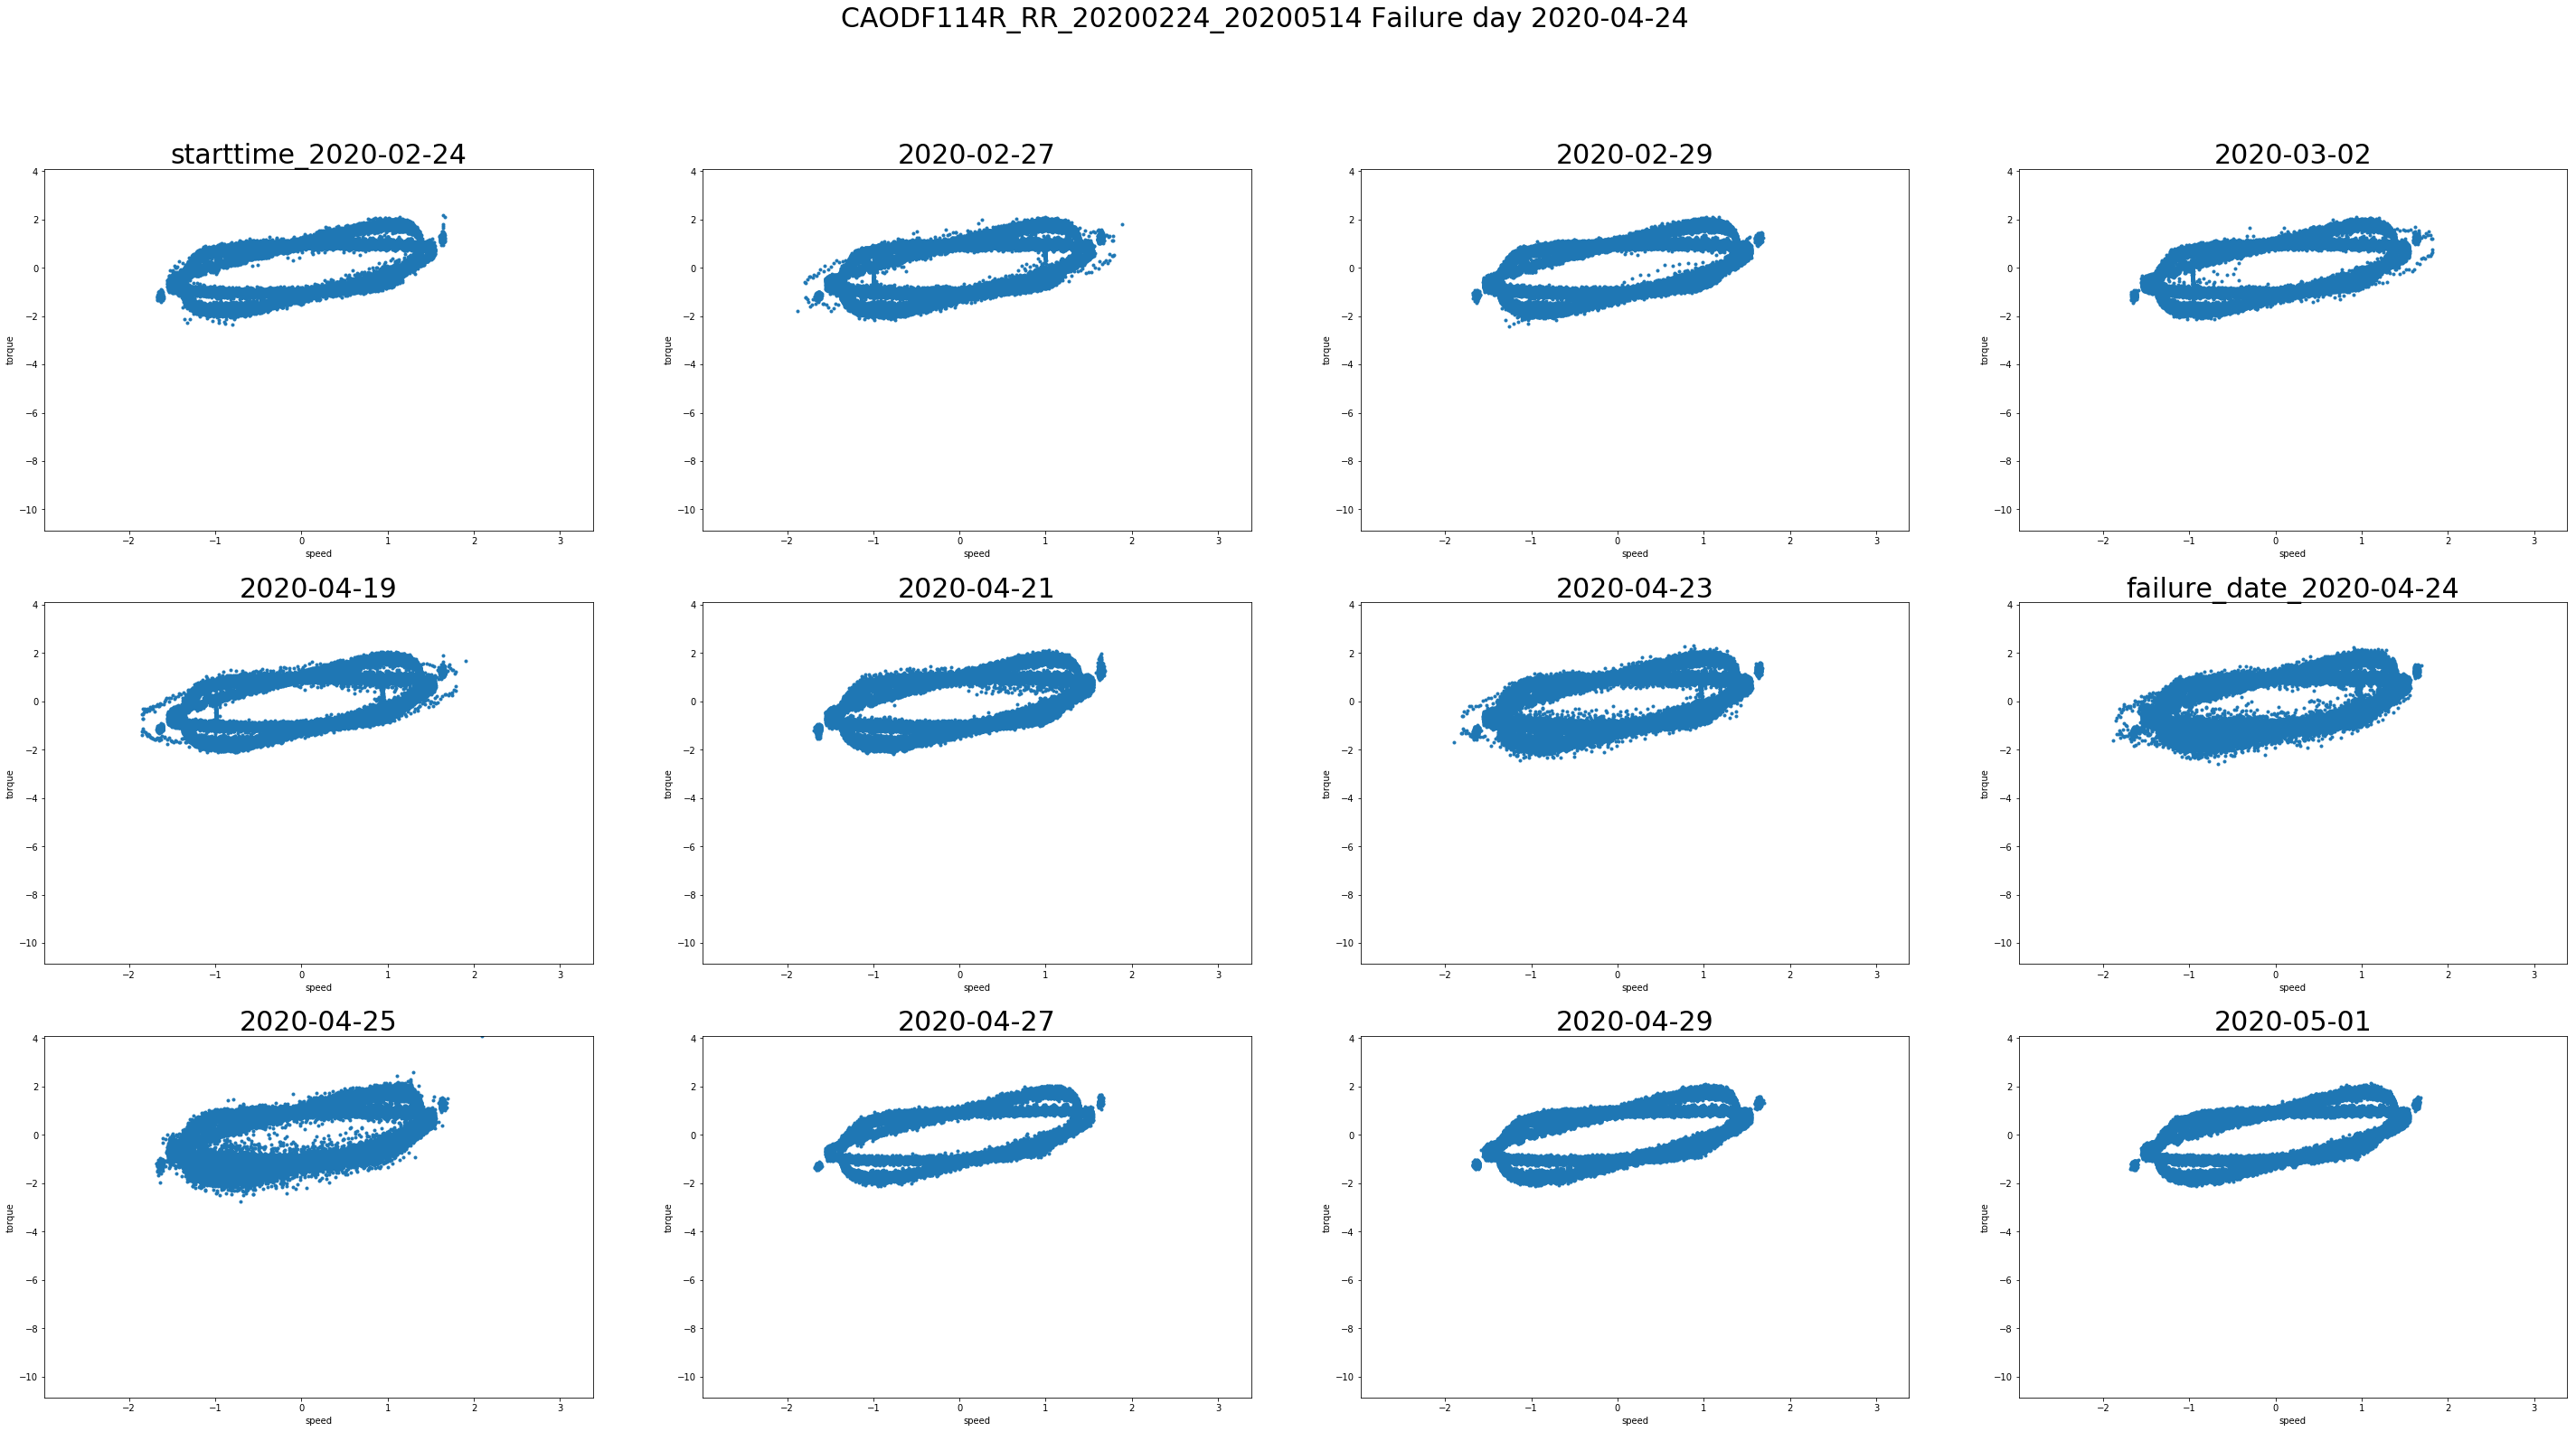

In [207]:
plot_scatter(test, save_file, recipe_type)

-342
339
-1539
1398


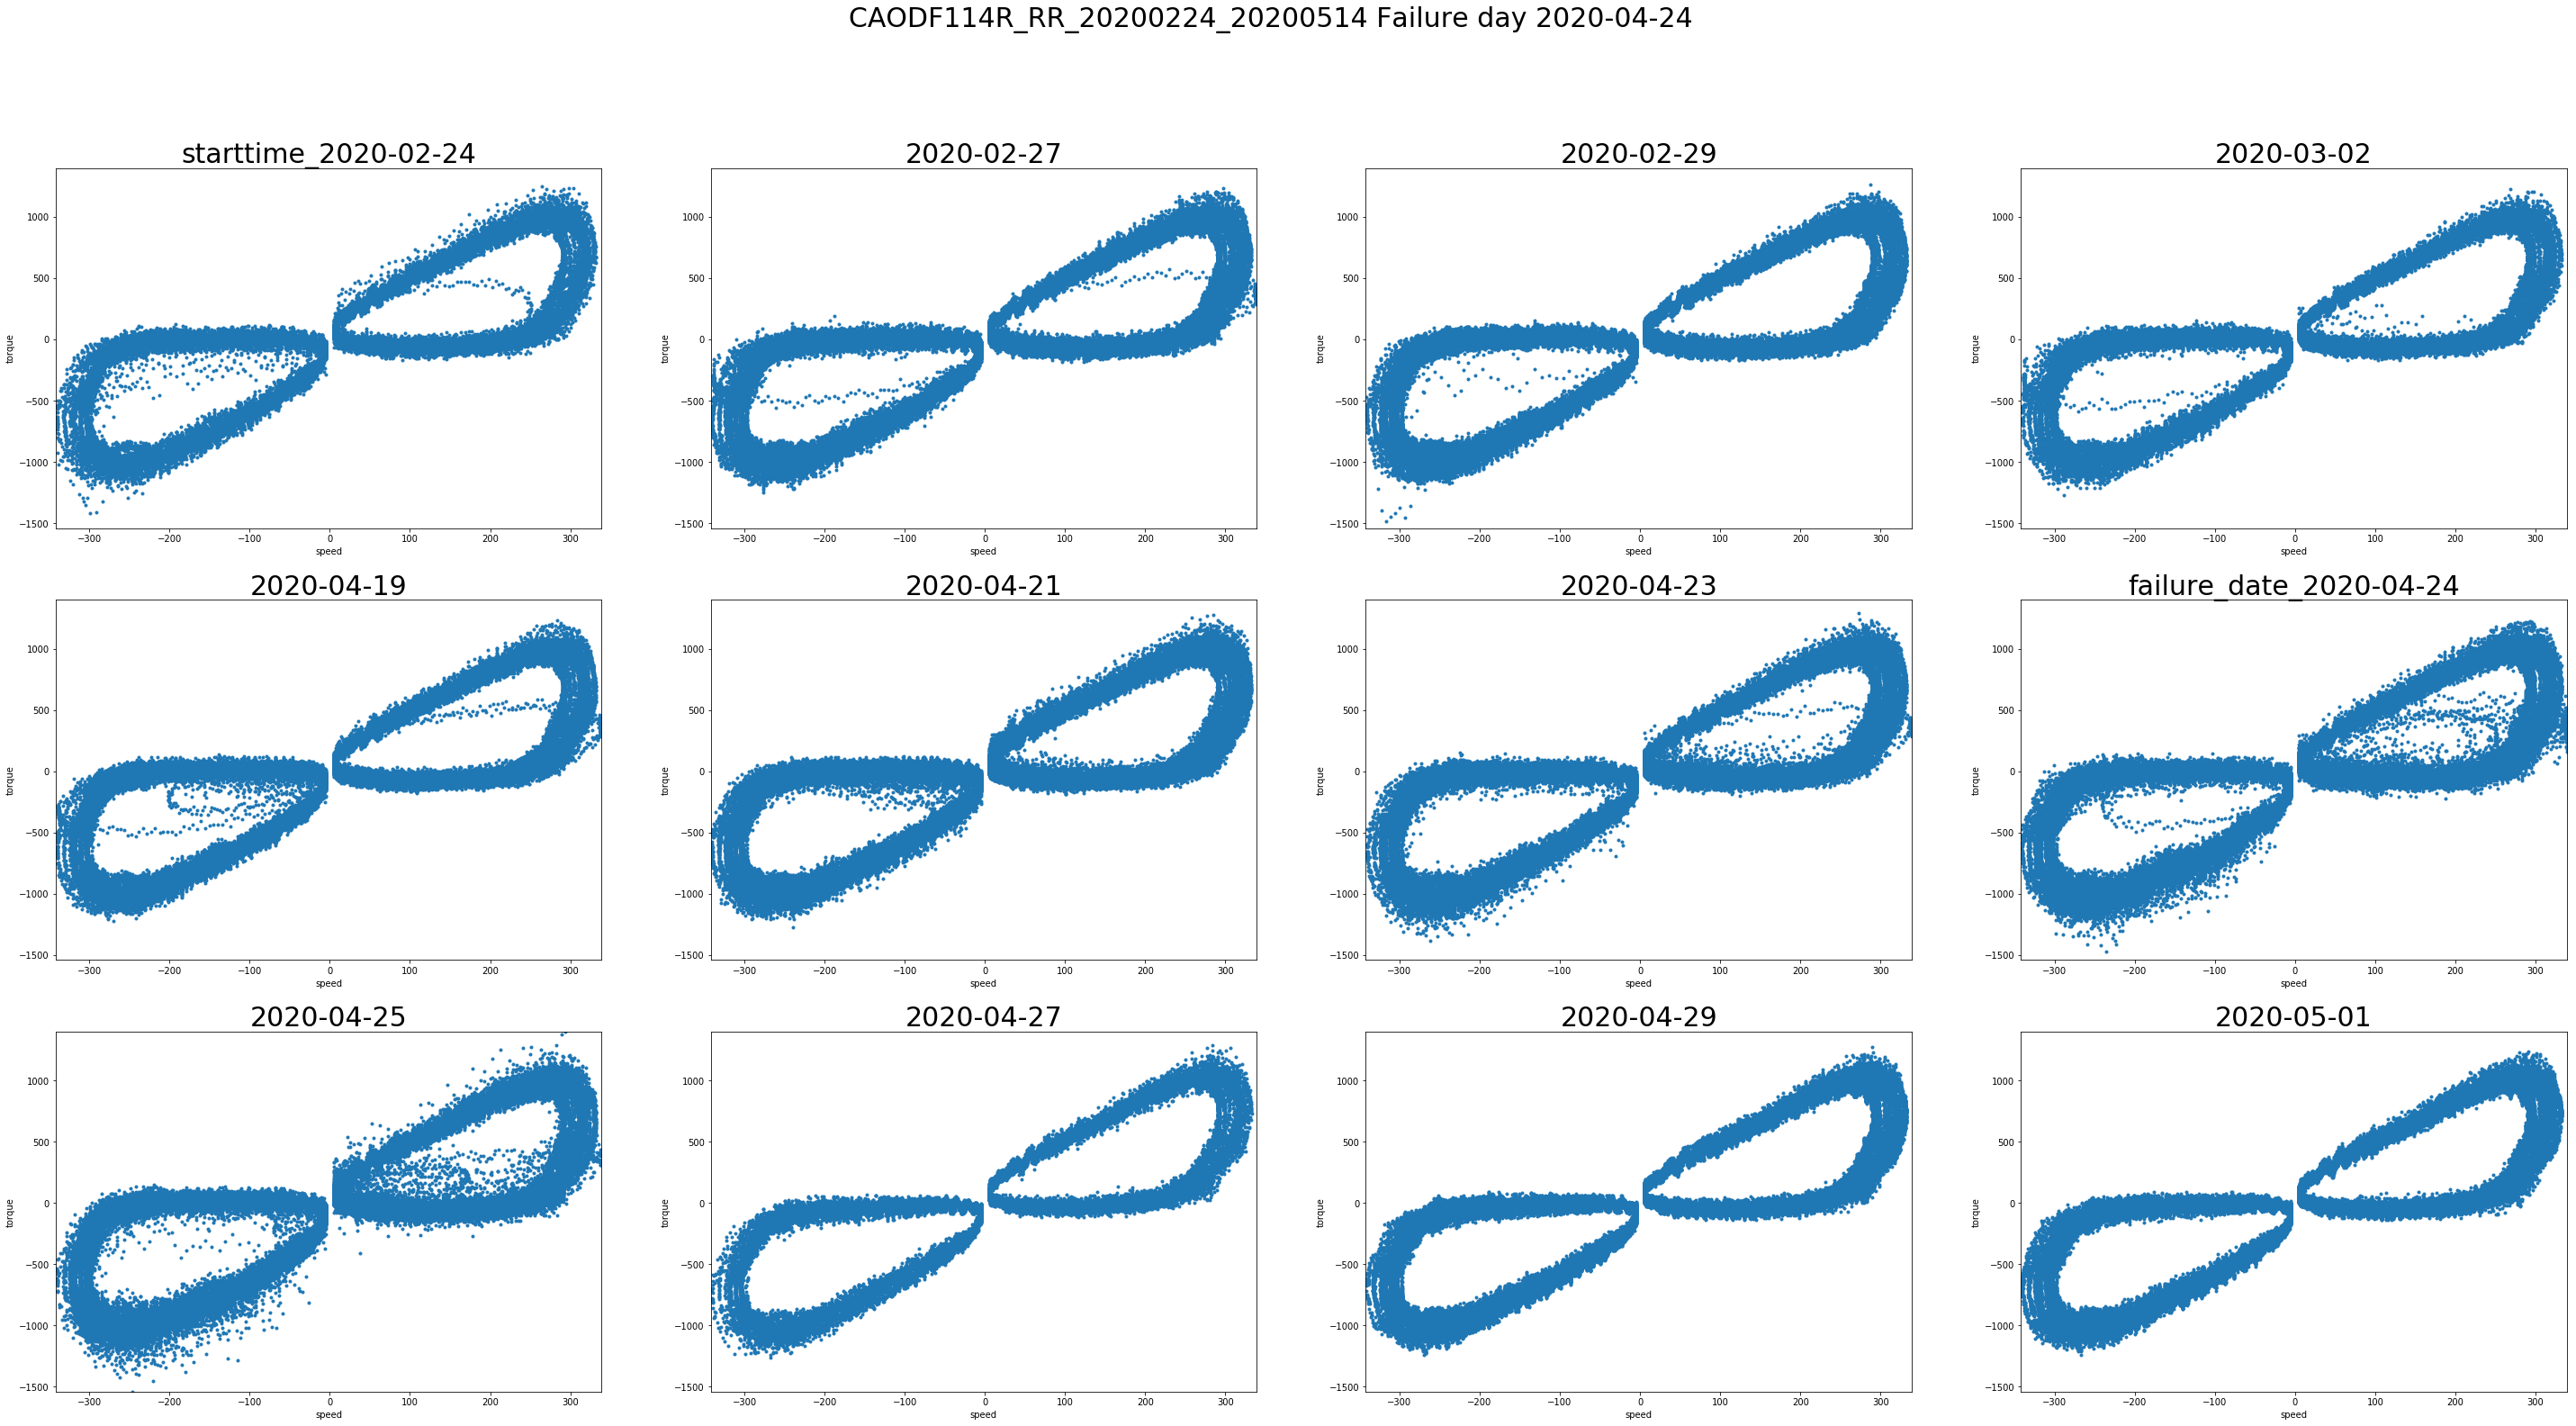

5
324
-262
1398


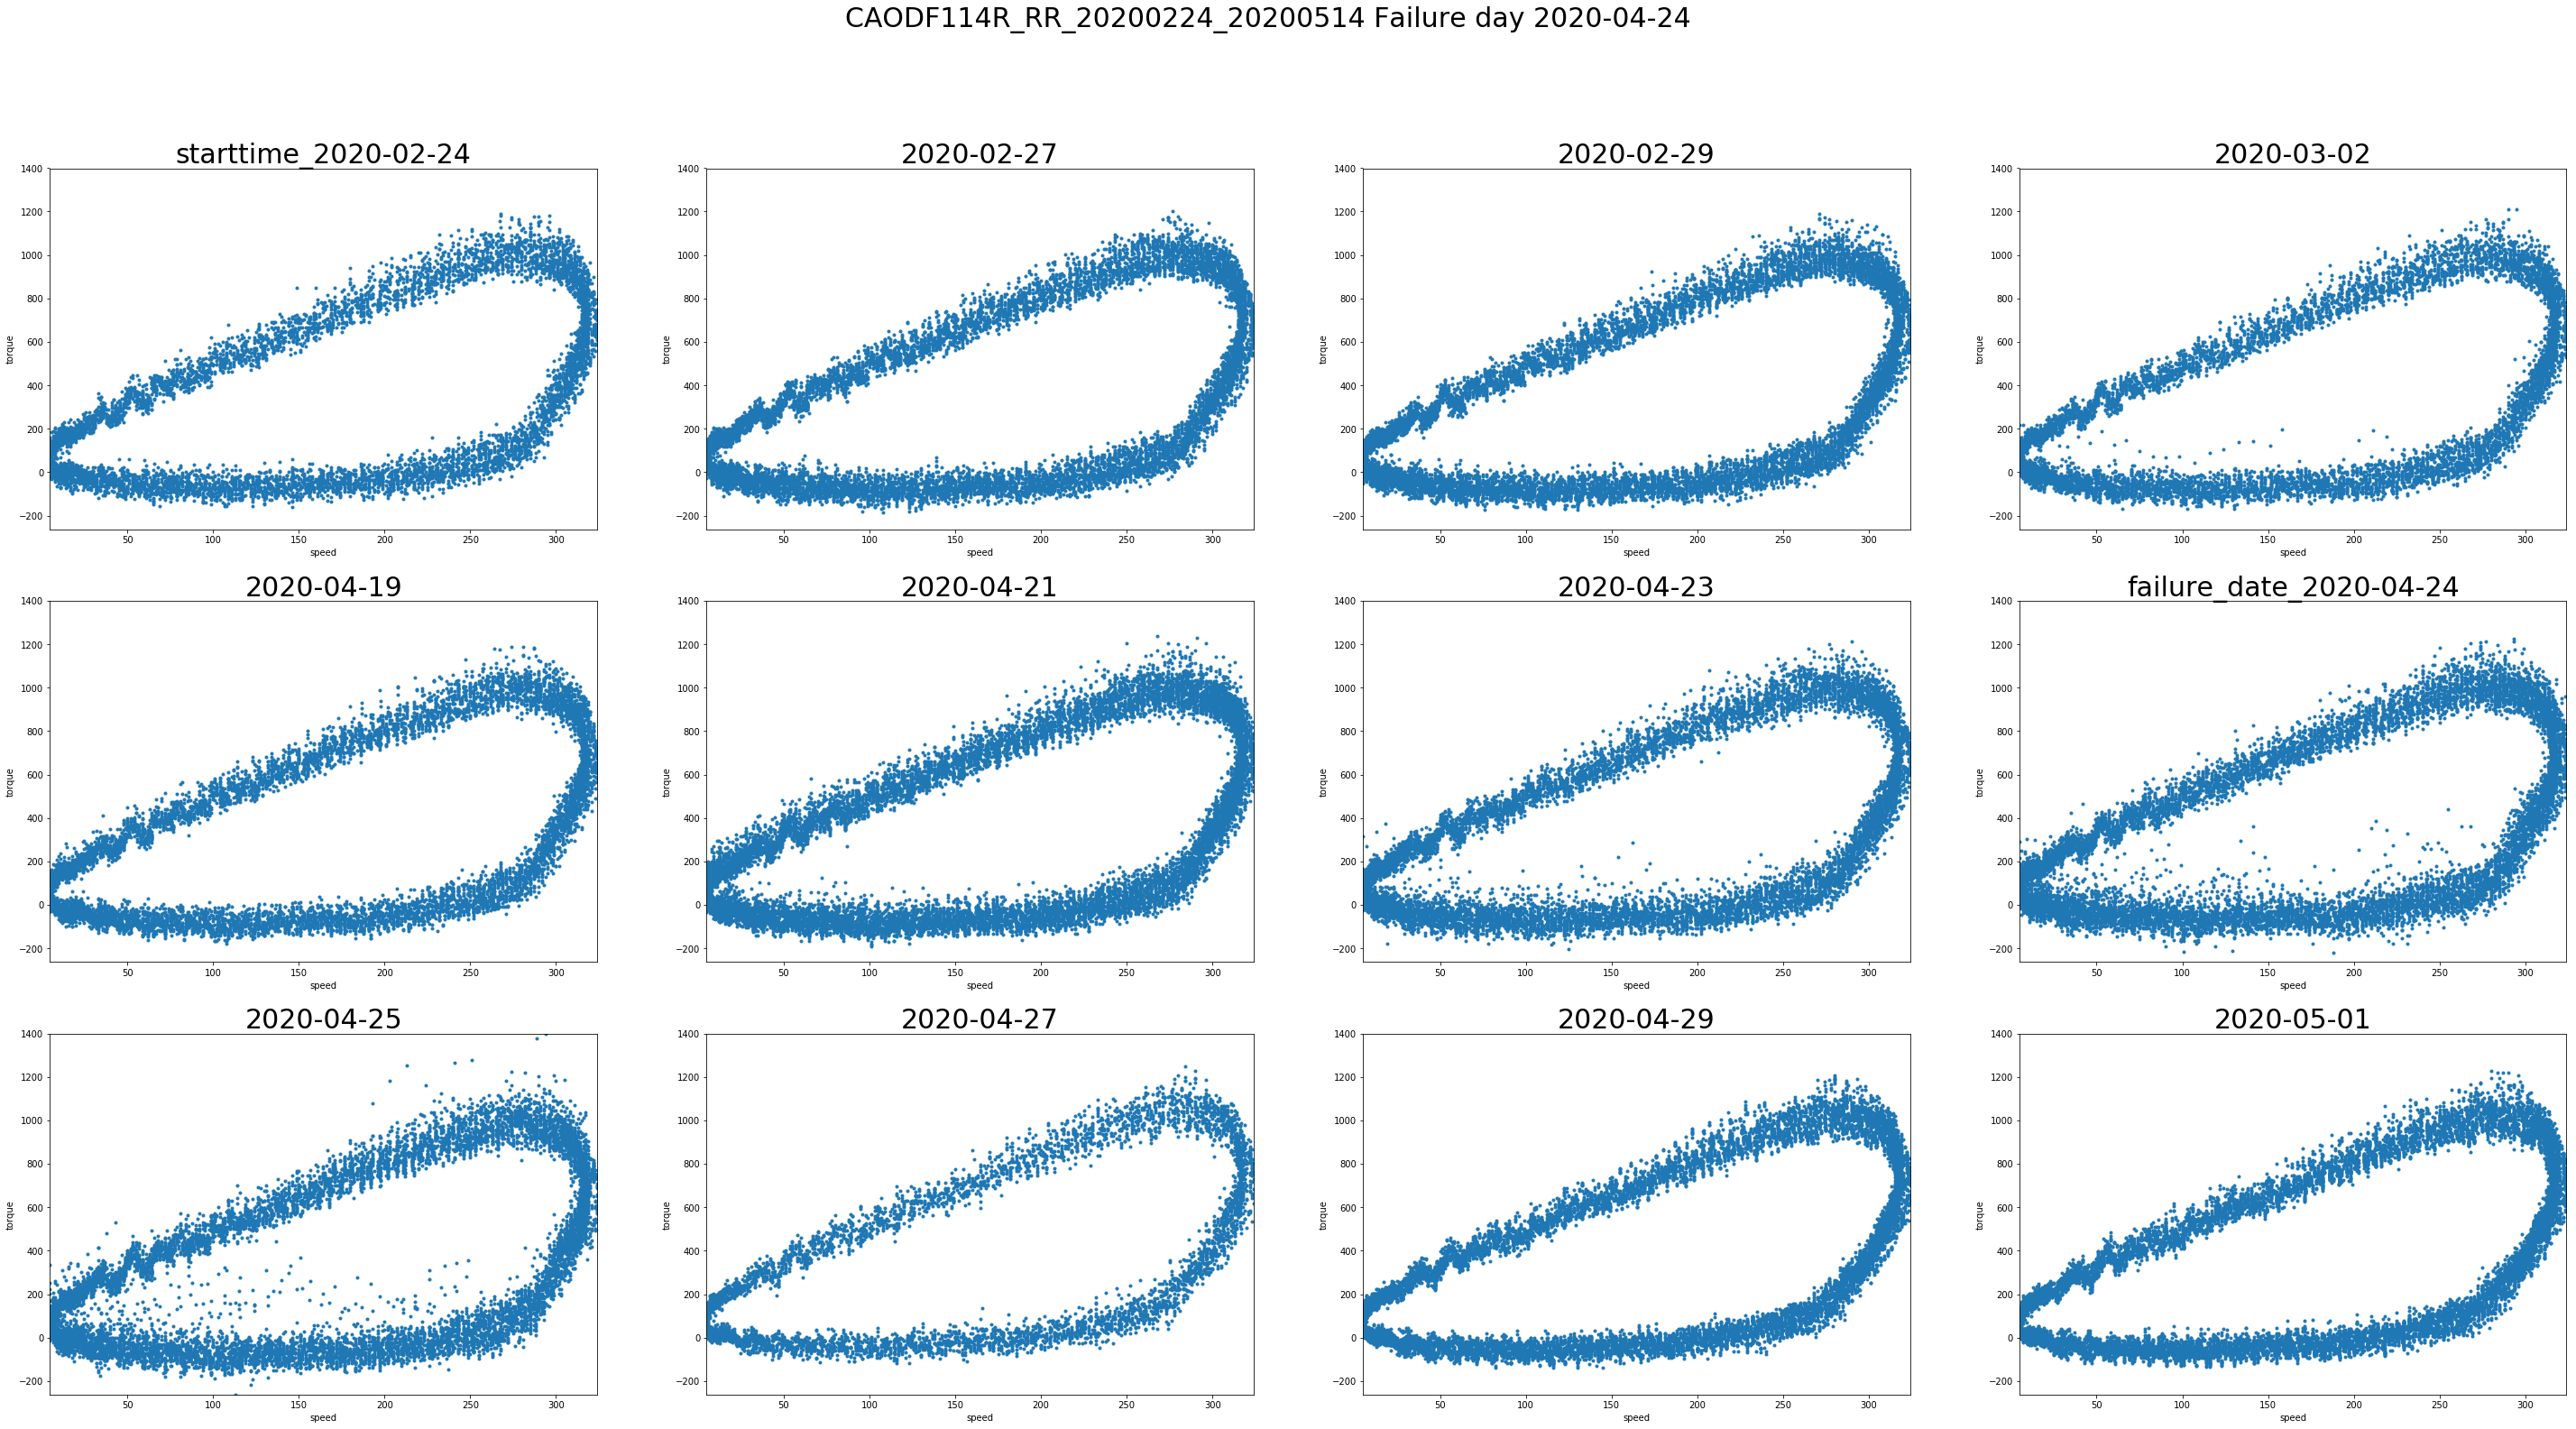

In [206]:
plot_scatter(df, save_file, recipe_type)
recipe_type = 'single_recipe'
if recipe_type == 'single_recipe':
    for i in recipe_data.index:
        if int(i.split("_")[2].split(" ")[0])>0:
            recipe_max_date = datetime.datetime.strptime(str(max(df[df['recipe']==i]['date'].unique())),'%Y-%m-%d')
            recipe_min_date = datetime.datetime.strptime(str(min(df[df['recipe']==i]['date'].unique())),'%Y-%m-%d')
            recipe_date_len = recipe_max_date-recipe_min_date
            #print(recipe_date_len)
            if recipe_date_len == file_date_len:
                sigle_recipe_df = df[df['recipe']== i]
                break
                
plot_scatter(sigle_recipe_df, save_file, recipe_type)

In [41]:
mask_idx = np.array(df[df.date==failure_date.date()].point.diff() < 0).nonzero()[0]
mask_idx = np.concatenate([[0], mask_idx])

In [42]:
df = df.reset_index()

In [43]:
df_list = []
for idx in tqdm(range(len(mask_idx) - 1)):
    print(len(df.loc[mask_idx[idx]:mask_idx[idx + 1]]))
    df_list.append(df.loc[mask_idx[idx]:mask_idx[idx + 1]])

 65%|██████▍   | 183/283 [00:00<00:00, 854.91it/s]

133
140
101
103
139
99
134
142
105
104
103
138
98
103
139
126
93
96
129
103
139
126
93
132
98
103
140
92
125
140
102
97
92
124
139
131
97
145
108
103
140
131
97
103
139
141
105
103
140
96
128
140
105
104
139
96
129
131
98
103
139
134
100
103
139
135
99
141
101
104
140
92
125
141
104
103
93
93
125
125
93
99
134
135
101
130
98
99
132
98
103
139
134
99
96
128
141
105
103
139
132
97
100
134
132
98
103
104
140
92
125
141
105
102
97
92
125
129
96
93
136
101
103
139
130
96
129
136
101
104
139
96
129
141
104
103
139
96
126
93
100
133
103
139
127
93
126
93
99
133
126
93
96
130
104
140
141
104
93
123
145
108
92
125
136
101
103
140
135
99
103
140
99
134
125
93
132
98
103
140
104
139
97
103
140
129
132
98
96
129
130
97
96
130
97
131
97
99
132
131
97
100
103
138


100%|██████████| 283/283 [00:00<00:00, 940.46it/s]

129
132
98
103
140
93
124
132
97
103
139
100
93
125
131
135
100
103
139
135
100
95
98
133
131
97
104
140
132
98
103
139
92
124
132
126
94
93
125
125
93
98
103
140
125
93
131
98
103
140
97
129
131
98
104
140
104
139
129
97
92
123
132
97
130
97
92
125
131
97
99
133
130
97
99
139
130
97
103


In [50]:
recipe_count = df.recipe.value_counts()

In [63]:
normal_day = df.starttime.min().date()

In [85]:
df[(df['date']==normal_day) & (df['recipe']=='CT125_150 MS-200_-225 U1')].torque[:].abs().var()

67319.4236836571

In [ ]:
df[(df['date']==normal_day-datetime.timedelta(days=1)) & (df['recipe']=='CT125_150 MS-200_-225 U1')].torque[:].abs().var()

In [84]:
df[(df['date']==fail_date) & (df['recipe']=='CT125_150 MS-200_-225 U1')].torque[:].abs().var()

67375.61459529313

In [89]:
df.date.unique()[0]

datetime.date(2019, 10, 15)

In [94]:
fail_date

datetime.date(2019, 11, 30)

In [95]:
for i in df.date.unique():
    print(i)
    print(df[(df['date']==i) & (df['recipe']=='CT125_150 MS-200_-225 U1')].torque[:].abs().var())
    print(df[(df['date']==i) & (df['recipe']=='CT125_150 MS-200_-225 U1')].torque[:].abs().mean())

2019-10-15
67319.4236836571
309.54222598722794
2019-10-16
67463.41211394352
310.27479103343467
2019-10-17
66761.6382005916
309.23361231791466
2019-10-18
67615.27842188269
310.3207219858742
2019-10-19
66716.59877989112
308.7919762258544
2019-10-20
67118.96360907416
309.3717463401561
2019-10-21
67359.44060688953
309.20074749991585
2019-10-22
66942.81344997756
309.2853580919261
2019-10-23
66400.75972739105
307.5831314103628
2019-10-24
67106.06822934402
309.17507951873876
2019-10-25
66593.23904115472
308.2789534176188
2019-10-26
67185.18559172683
308.7721634810899
2019-10-27
67092.12025361364
309.34841823410795
2019-10-28
67321.72585973842
309.64005739483446
2019-10-29
67856.24901090412
311.01921083802193
2019-10-30
66824.9462778646
309.0254883776588
2019-10-31
67309.7454863449
308.8580426037064
2019-11-01
68830.56518115282
312.3785098492511
2019-11-02
67695.83006087499
310.119204664946
2019-11-03
67282.46315335765
308.515987670368
2019-11-04
67149.98620870689
308.64615906393084
2019-11-05

In [74]:
fail_date

datetime.date(2019, 11, 30)

In [71]:
fail_date = failure_date.date()

In [60]:
for i in recipe_count.index:
    #df.starttime.min().date()
    df[df['date']==normal_day and].torque
    #df[

CT125_150 MS-200_-225 U1
CT125_150 MS225_250 U1
CT100_125 MS275_300 U1
CT75_100 MS-325_-350 U1
CT75_100 MS275_300 U1
CT75_100 MS-300_-325 U1
CT125_150 MS200_225 U1
CT100_125 MS-200_-225 U1
CT75_100 MS300_325 U1
CT75_100 MS-275_-300 U1
CT100_125 MS-300_-325 U1
CT100_125 MS225_250 U1
CT100_125 MS-325_-350 U1
CT100_125 MS-275_-300 U1
CT125_150 MS-200_-225 U0
CT125_150 MS-200_-225 U2
CT150_175 MS200_225 U1
CT325_350 MS25_50 U9
CT200_225 MS-100_-125 U3
CT175_200 MS-100_-125 U4


In [61]:
df.starttime.min().date()

datetime.date(2019, 10, 15)

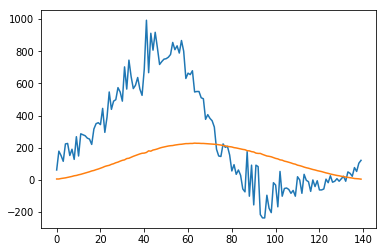

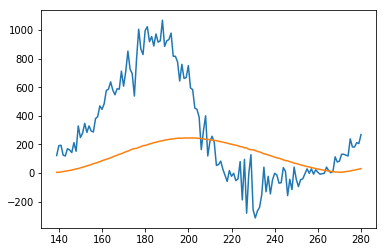

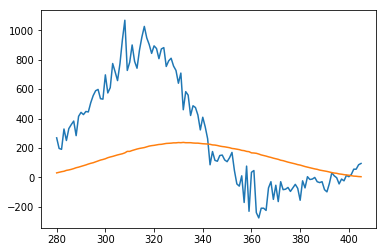

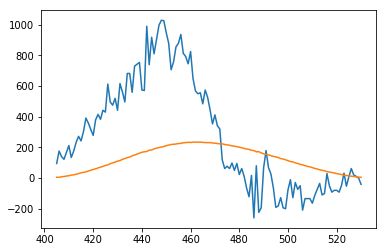

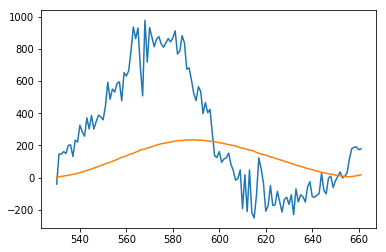

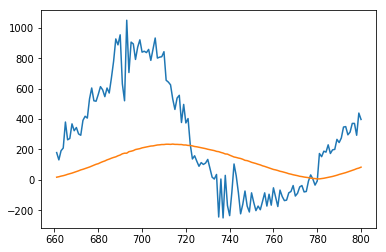

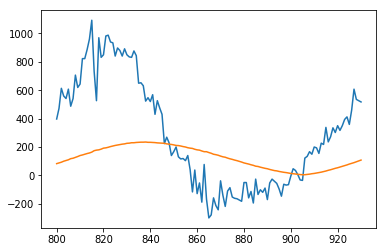

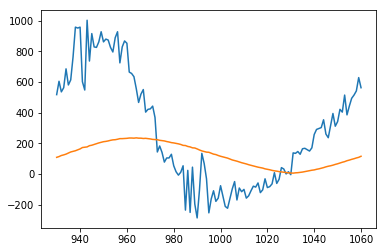

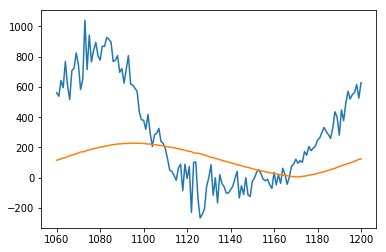

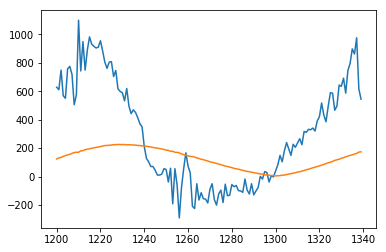

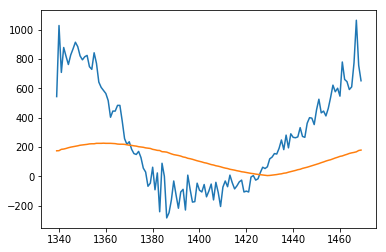

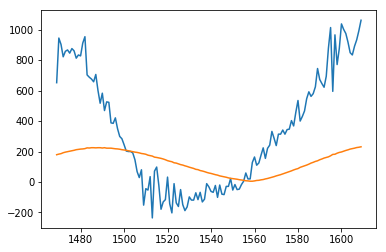

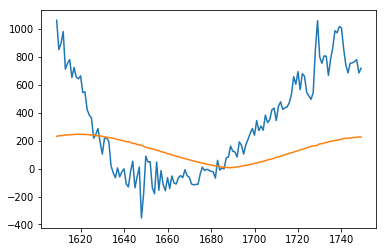

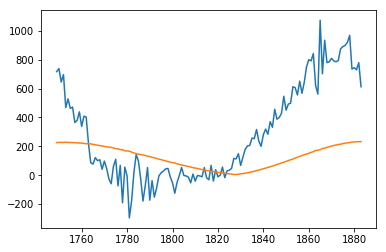

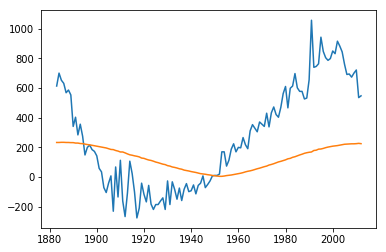

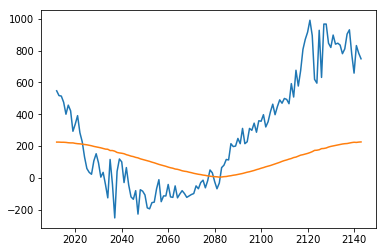

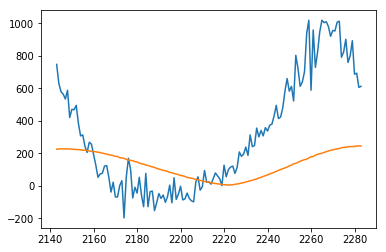

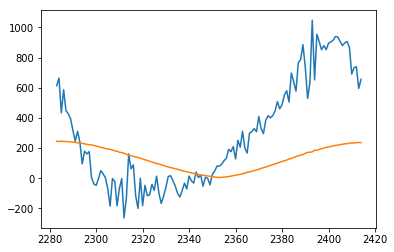

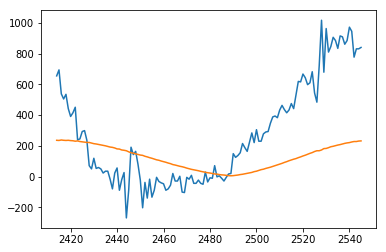

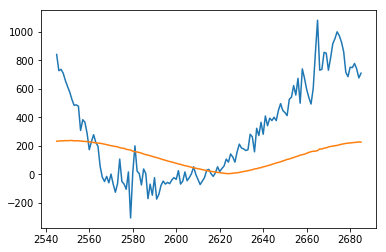

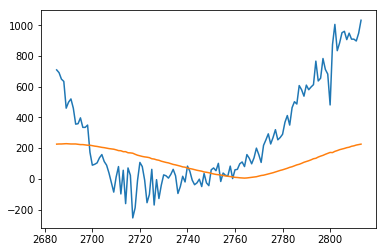

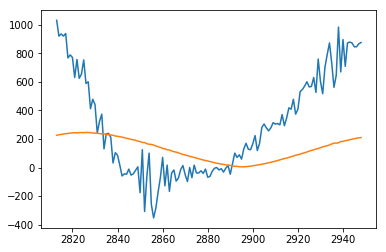

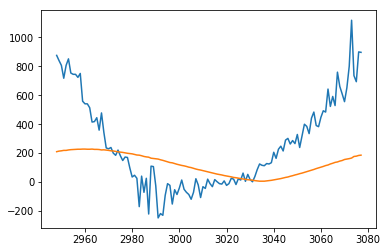

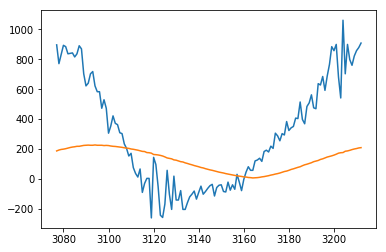

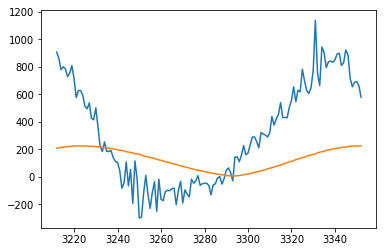

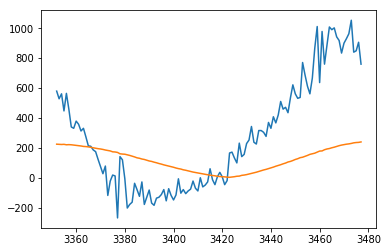

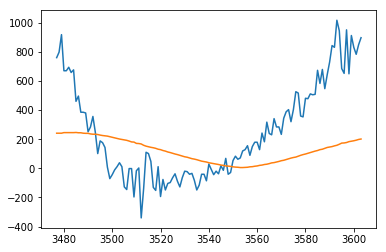

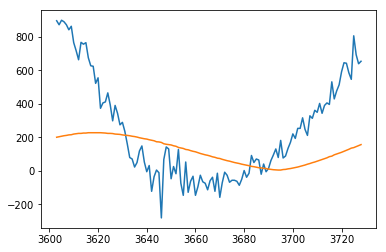

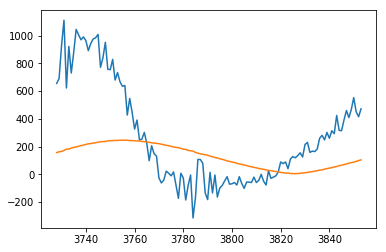

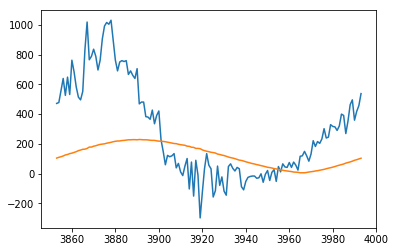

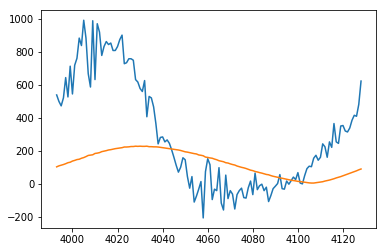

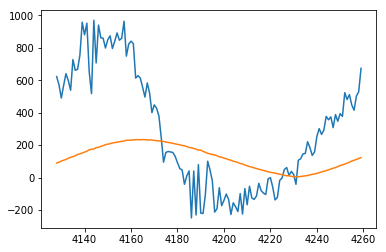

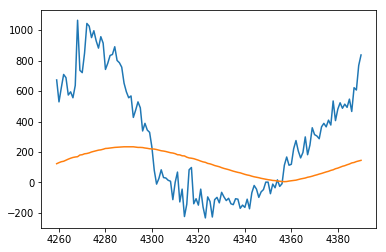

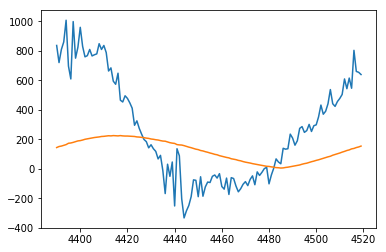

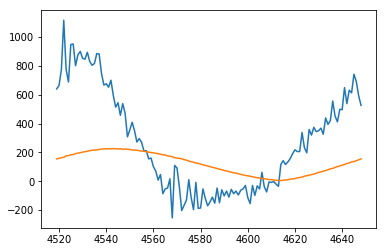

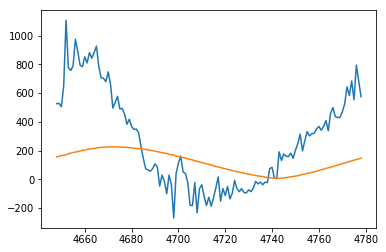

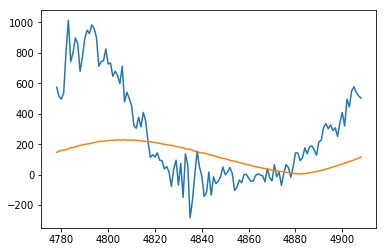

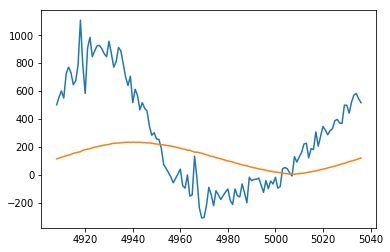

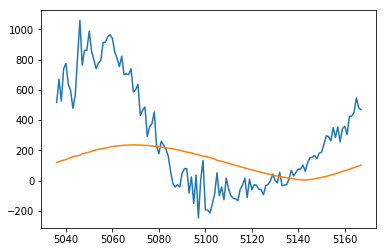

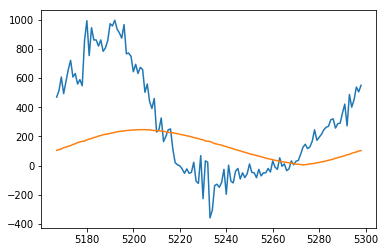

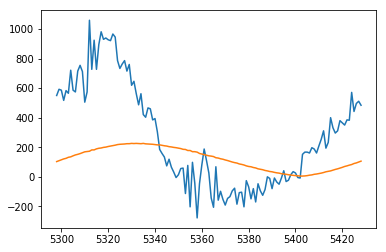

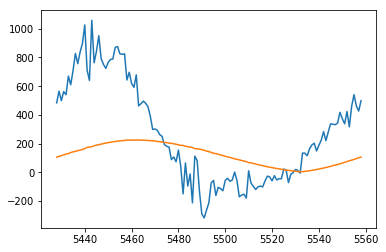

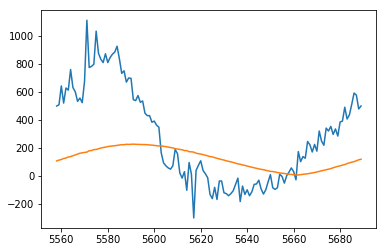

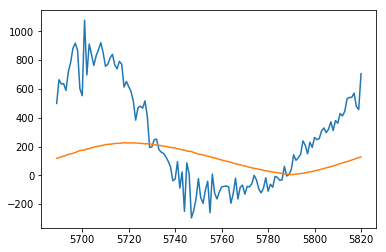

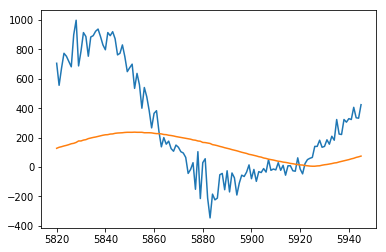

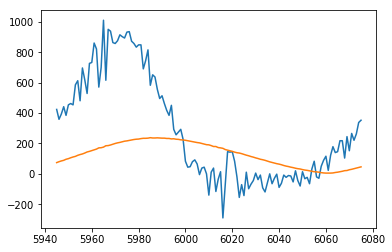

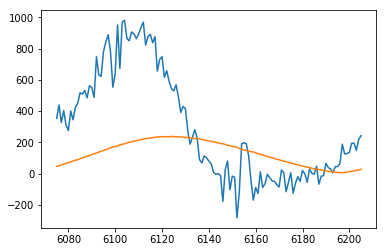

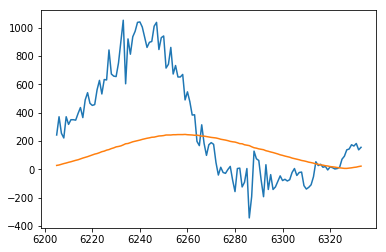

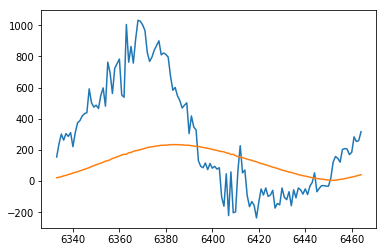

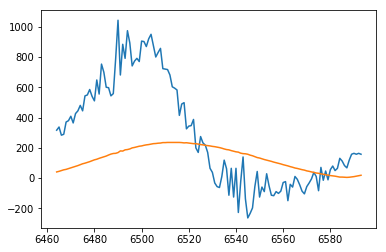

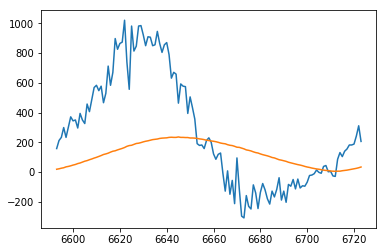

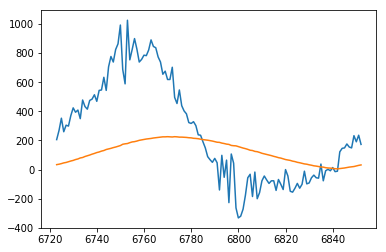

In [36]:
for i in df_list:
    plt.plot(i.torque)
    plt.plot(i.speed)
    plt.show()